# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data set

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

Let's take a look at the structure of the dataset

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Let's see the name of columns available in our dataset and see their corresponding data type

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Now, let's check for null values in each column

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Setting the index to RowNumber

In [6]:
data.set_index('RowNumber', inplace=True)

In [7]:
data.describe() #to see statistical information of the dataset

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.shape # to view the size of our dataset

(10000, 13)

# Feature Engineering
Here we drop columns that are not useful to our model, and encode categorical features or non numerical features using the necessary methods

## Checking for data balance

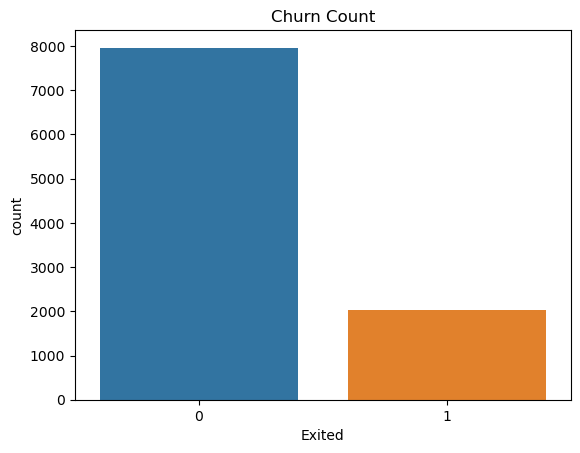

In [9]:
sns.countplot(data=data, x='Exited')
plt.title('Churn Count')
plt.show()

From the count plot above, we can see that there's data imbalance. This means the data is biased toward class 0 (Customers that did not churn) which will also affect the Model's performance.

Let's see the number of customers that churn or not based on Geography and Gender

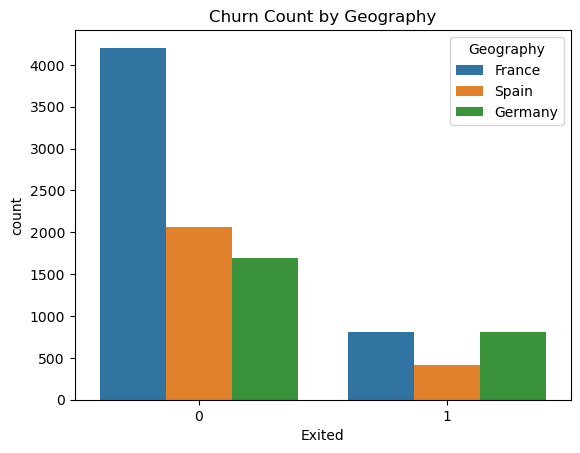

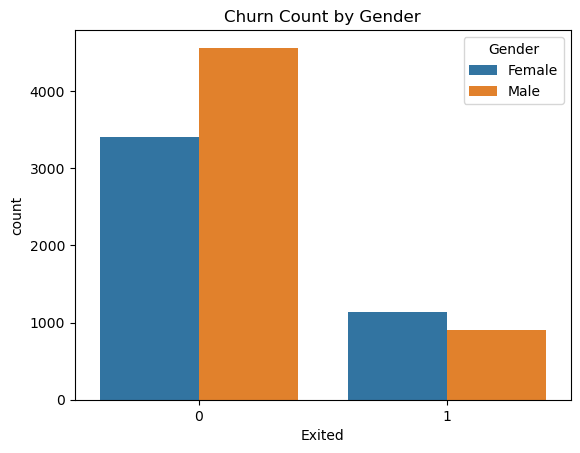

In [10]:
# number of customers that churn or not by Gender and Geography 
# Plot for Geography
sns.countplot(data=data, x='Exited', hue='Geography')
plt.title('Churn Count by Geography')
plt.show()
# Plot for Gender
sns.countplot(data=data, x='Exited', hue='Gender')
plt.title('Churn Count by Gender')
plt.show()

## Deleting Columns 
These columns would not contribute in any significant way to improve the model's performance

In [11]:
del data['CustomerId']
del data['Surname']

## Encoding Categorical Features

In [12]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Geography'] = data['Geography'].map({'France': 1, 'Spain': 2, 'Germany': 3})

In [13]:
## Let's look at our data again
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,1,1,42,2,0.00,1,1,1,101348.88,1
2,608,2,1,41,1,83807.86,1,0,1,112542.58,0
3,502,1,1,42,8,159660.80,3,1,0,113931.57,1
4,699,1,1,39,1,0.00,2,0,0,93826.63,0
5,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 937.5 KB


## Checking For Outliers

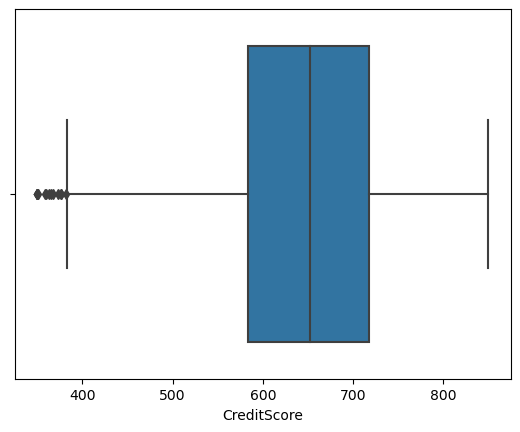

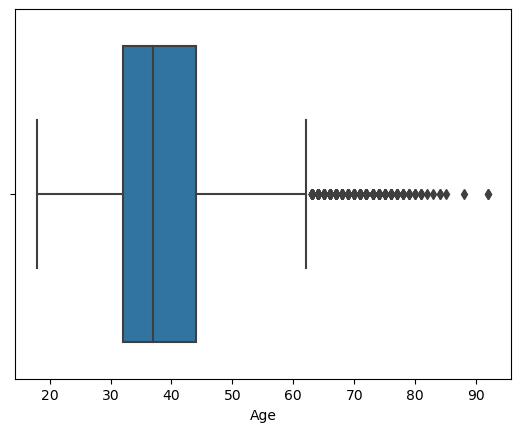

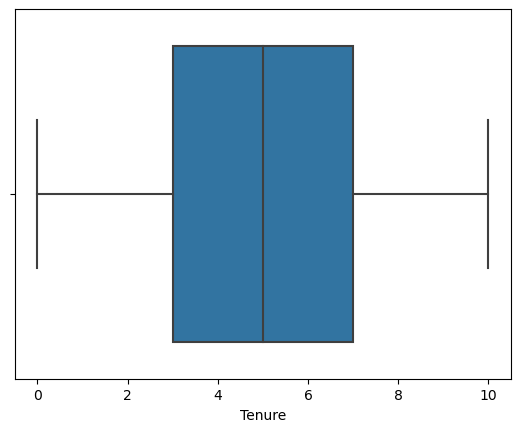

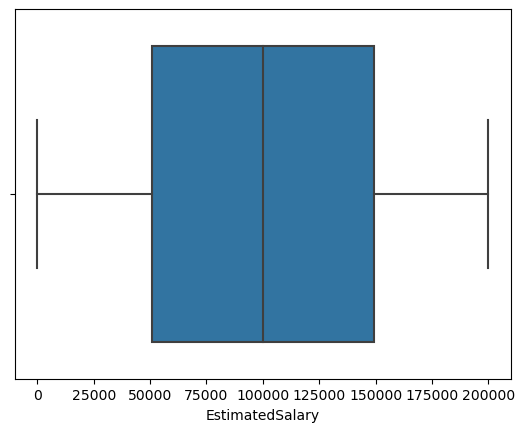

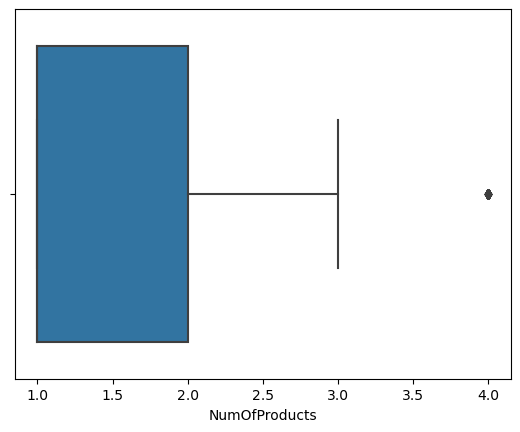

In [15]:
# columns with possible outliers = col_poss_outliers
col_poss_outliers = ['CreditScore', 'Age', 'Tenure', 'EstimatedSalary', 'NumOfProducts']
for column in col_poss_outliers:
    sns.boxplot(data= data, x=column)
    plt.show()

In [16]:
features = data.drop('Exited', axis = 1)
matrix = features.corr()
matrix

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,0.008267,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Geography,0.008267,1.000000,0.016936,0.048092,0.001418,0.348700,-0.006180,0.004036,-0.012692,0.007382
Gender,0.002857,0.016936,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112
Age,-0.003965,0.048092,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,0.001418,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.348700,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.006180,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,0.004036,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,-0.012692,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,0.007382,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


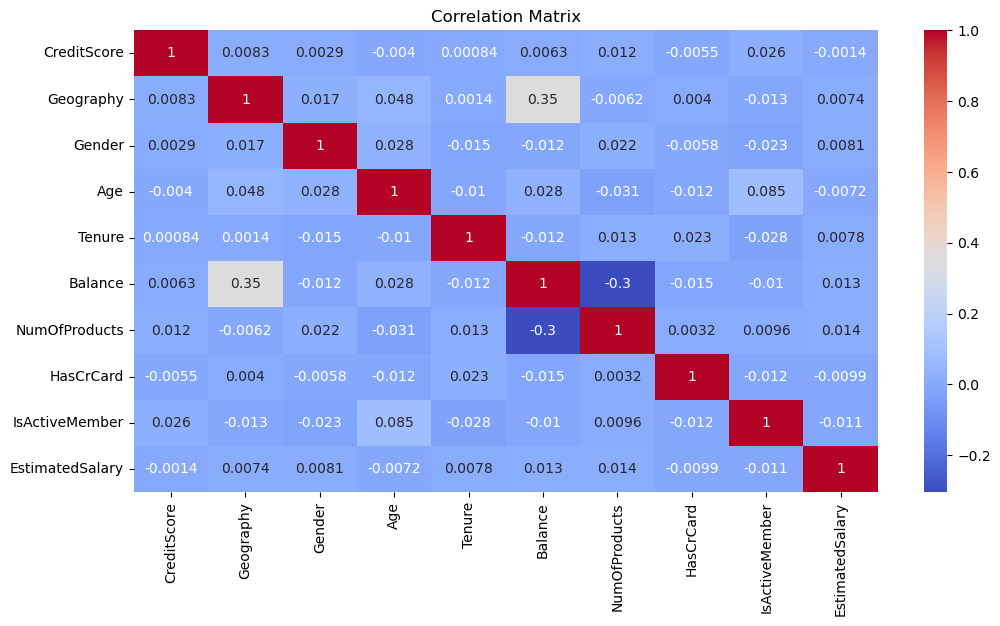

In [17]:
# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can see that almost all variables are independent of each other, this implies that each feature will contribute to our model performance as there is no reasonable correlation.

# Importing tools necessary for our model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay, r2_score, mean_absolute_error

In [19]:
# Features and target variable
X = features
y = data['Exited']

In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

## Using Logistic Regression Algorithm(Model)

In [21]:
# Create and train the model
model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Users\EMES BABASIDI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# Make predictions
y_pred = model1.predict(X_test)

# Evaluating the model

In [23]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.7923333333333333
Confusion Matrix:
[[2336   53]
 [ 570   41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2389
           1       0.44      0.07      0.12       611

    accuracy                           0.79      3000
   macro avg       0.62      0.52      0.50      3000
weighted avg       0.73      0.79      0.73      3000



# Feature Scaling
Standardizing features and see our models performance

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [25]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [26]:
y_pred = pipe.predict(X_test)

In [27]:
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.807

## Evaluating the Model
Let's evaluate the model a second time after scaling:

In [28]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.807
Confusion Matrix:
[[2297   92]
 [ 487  124]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2389
           1       0.57      0.20      0.30       611

    accuracy                           0.81      3000
   macro avg       0.70      0.58      0.59      3000
weighted avg       0.77      0.81      0.77      3000



As Noted the Model perform better after scaling.

## Using Random Forest Regression Algorithm (Model)

In [29]:
from sklearn.ensemble import RandomForestRegressor 

In [30]:
model2 = RandomForestRegressor(n_estimators=120, random_state=42)  # Create a Random Forest Regressor with 80 trees
model2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=42)

In [31]:
# Make predictions
y_pred = model2.predict(X_test)

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Evaluations MAE: {mae}, MSE: {mse}, R2: {r2}")

Test Evaluations MAE: 0.21327222222222225, MSE: 0.11016986111111111, R2: 0.32072137093155406


MAE (0.2066): Indicates that on average, the model's predictions are off by about 0.21 units.<br>
MSE (0.1081): Shows that the average squared difference between predicted and actual values is 0.108, with larger errors having a greater impact.<br>
R² (0.3114): Indicates that the model explains about 31.14% of the variance in the churn data, suggesting that there is room for improvement.

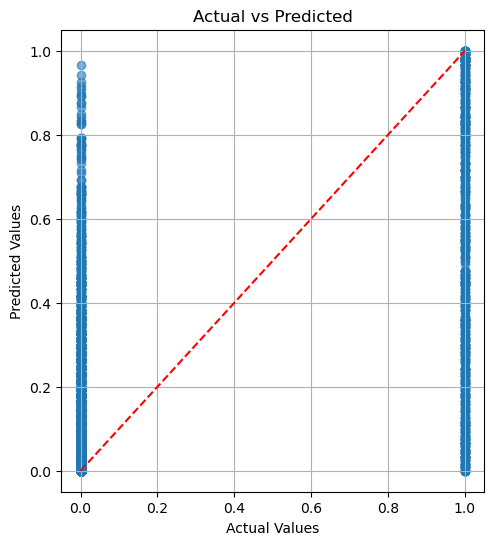

In [33]:
plt.figure(figsize=(12, 6))
# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()

From the scattered plot above, we can see tha the model distinguish well between churn and no churn, with most points close to 0 or 1.

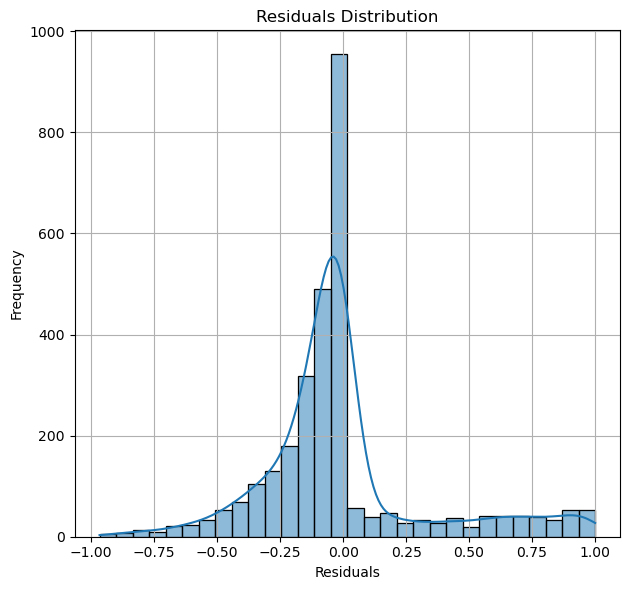

In [34]:
plt.figure(figsize=(12, 6))
# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()

The residuals are mostly centered around 0, indicating the model predictions are generally accurate, although there is some variability in the prediction errors.